In [1]:
import pandas as pd
import numpy as np

# 1
file_path = 'En_In.xls'
Energy = pd.read_excel(file_path)
Energy = Energy.iloc[:, 2:]
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

In [2]:
# 2
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors='coerce')
Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000

In [3]:
# 3
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

In [4]:
# 4
Energy['Country'] = Energy['Country'].str.replace(r"\(.*\)|\d+", "", regex=True)

Energy['Country'] = Energy['Country'].replace(rename_dict)
Energy['Country'] = Energy['Country'].str.strip()

In [5]:
# Результати 1-4
Energy.loc[Energy['Country'].isin(['Bolivia', 'Hong Kong', 'South Korea', 'United Kingdom', 'United States'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
41,Bolivia,3.360000e+08,32,31.47712
60,Hong Kong,5.850000e+08,82,0
181,South Korea,1.100700e+10,221,2.279353
231,United Kingdom,7.920000e+09,124,10.60047
233,United States,9.083800e+10,286,11.57098


In [6]:
# 5
file_path = 'gpd.csv'  
column_names = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))
GPD = pd.read_csv(file_path, header=None, names=column_names, skiprows=5)

country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GPD['Country'] = GPD['Country'].replace(country_renames)

In [7]:
# Результати 5
GPD.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [8]:
# 6
scimagojr_file = 'scimagojr.xlsx'
scimago_data = pd.read_excel(scimagojr_file)

In [9]:
# 7
top_country = scimago_data[scimago_data['Rank'] <= 15].reset_index(drop=True)
top_country[['Rank', 'Country']]

Energy_file = 'En_In.xls'
Energy_data = pd.read_excel(Energy_file).iloc[:, 2:]
Energy_data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy_data['Energy Supply'] = pd.to_numeric(Energy_data['Energy Supply'], errors = 'coerce') * 1_000_000
Energy_data['Country'] = Energy_data['Country'].str.replace(r"\(.*\)|\d+", "", regex = True).str.strip()
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
Energy_data['Country'] = Energy_data['Country'].replace(rename_dict)

GPD_file = 'gpd.csv'
column_names = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))
GPD_data = pd.read_csv(GPD_file, header = None, names = column_names, skiprows = 4)
GPD_data['Country'] = GPD_data['Country'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})
GPD_data = GPD_data[['Country'] + list(range(2006, 2016))]

merged = pd.merge(top_country, Energy_data, on='Country', how='inner')
merged = pd.merge(merged, GPD_data, on='Country', how='inner')

Result = merged.set_index('Country')
Result = Result[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]

In [10]:
# Результати 6-7
Result.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [11]:
# Результати 6-7
Result.shape

(15, 20)

In [12]:
# 8
def task_eight():
    columns = list(range(2006, 2016))
    average_gdp = Result[columns].mean(axis = 1).sort_values(ascending = False)
    
    return average_gdp

In [13]:
# Результати 8
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [14]:
# 9
def task_nine():
    average_gdp = task_eight()
    fifth_country_gdp = average_gdp.index[4]
    gdp_change = Result.loc[fifth_country_gdp, 2015] - Result.loc[fifth_country_gdp, 2006]
    
    return (fifth_country_gdp, gdp_change)

In [15]:
# Результати 9
task_nine()

('France', 153345695364.24023)

In [16]:
# 10
def task_ten():
    Result['% Renewable'] = pd.to_numeric(Result['% Renewable'], errors='coerce')
    max_renewable = Result['% Renewable'].idxmax()
    max_renewable_value = Result.loc[max_renewable, '% Renewable']
    
    return (max_renewable, max_renewable_value)

In [17]:
# Результати 10
task_ten()

('Brazil', 69.64803)

In [18]:
# 11
def task_eleven():
    Result['Population Estimate'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    population_sorted = Result['Population Estimate'].sort_values(ascending=False)
    sixth_most_populated_country = population_sorted.index[5]
    sixth_population_value = population_sorted.iloc[5]
    
    return (sixth_most_populated_country, sixth_population_value)

In [19]:
# Результати 11
task_eleven()

('Japan', 127409395.97315437)

In [20]:
# 12
def task_twelve():
    Result['Population Estimate'] = pd.to_numeric(Result['Population Estimate'], errors='coerce')
    Result['Energy Supply per Capita'] = pd.to_numeric(Result['Energy Supply per Capita'], errors='coerce')
    Result['Citable docs per Capita'] = Result['Citable documents'] / Result['Population Estimate']
    correlation = Result['Citable docs per Capita'].corr(Result['Energy Supply per Capita'])
    
    return correlation

In [21]:
# Результати 12
task_twelve()

0.7940010435442946

In [22]:
# 13
def task_thirteen():
    renewable_median = Result['% Renewable'].median()
    Result['Renewable Flag'] = (Result['% Renewable'] >= renewable_median).astype(int)
    sorted_series = Result.sort_values(by='Rank')['Renewable Flag']
    
    return sorted_series

In [23]:
# Результати 13
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Flag, dtype: int32

In [24]:
# 14
def task_forteen():
    ContinentDict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America', 
        'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia', 
        'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 
        'Brazil': 'South America'
    }
    Result['Continent'] = Result.index.to_series().map(ContinentDict)
    Result['Population Estimate'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    population_statistics = Result.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    
    return population_statistics

In [25]:
# Результати 14
task_forteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


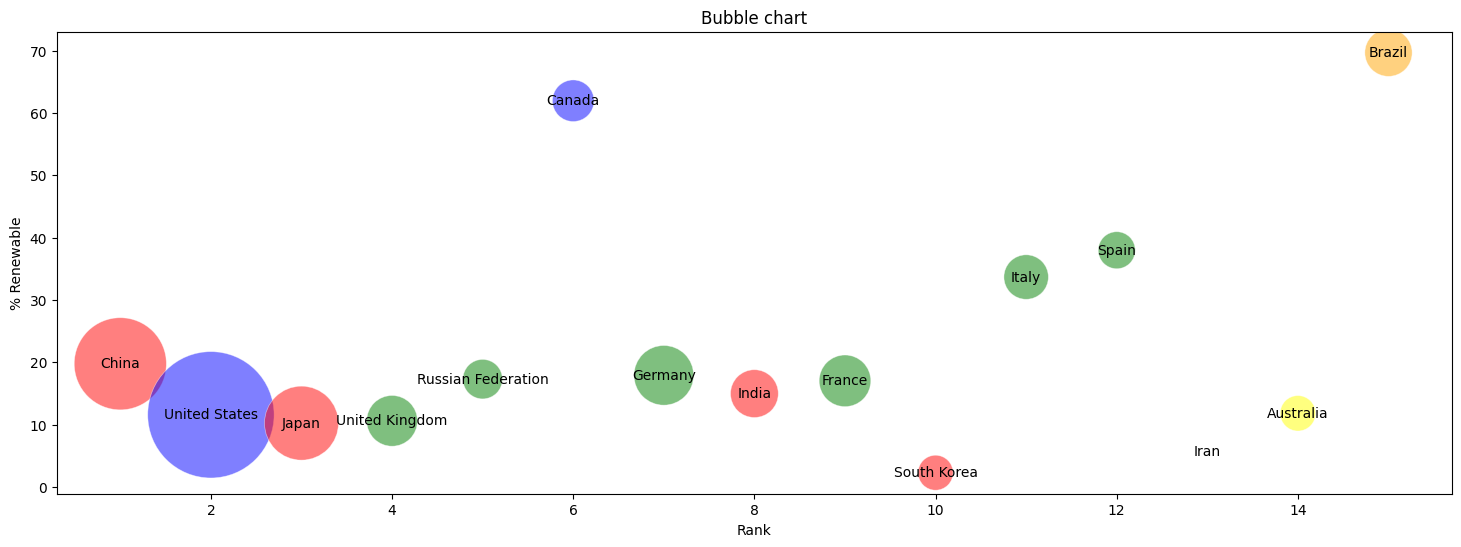

In [26]:
# 15
import matplotlib.pyplot as plt

continent_dict = {'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 'United Kingdom': 'Europe',
                 'Russian Federation': 'Europe', 'Canada': 'North America', 'Germany': 'Europe','India': 'Asia',
                 'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia',
                 'Australia': 'Australia', 'Brazil': 'South America'}
Result['Continent'] = Result.index.to_series().map(continent_dict)

continent_palette = {'Asia': 'red', 'North America': 'blue', 'Europe': 'green', 'Australia': 'yellow', 'South America': 'orange'}

plt.figure(figsize=(18, 6))
bubble_chart = plt.scatter(
    x=Result['Rank'],
    y=Result['% Renewable'],
    s=Result[2015] / 2e9,
    c=Result['Continent'].map(continent_palette),
    alpha=0.5, edgecolors="w", linewidth=0.5
)

for i, country in enumerate(Result.index):
    plt.text(
        Result['Rank'][i],
        Result['% Renewable'][i],
        country,
        ha='center', va='center', fontsize=10, color='black'
    )

plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.title('Bubble chart')

plt.show()